In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [61]:
df = pd.read_csv('data.csv',encoding='shift-jis')

In [62]:
df.head()

,年月日,平均気温(℃),平均気温(℃).1,平均気温(℃).2
0,2010/1/1,4.8,8,1
1,2010/1/2,6.3,8,1
2,2010/1/3,5.7,8,1
3,2010/1/4,6.5,8,1
4,2010/1/5,7.3,8,1


In [63]:
df = df.drop(['平均気温(℃).1','平均気温(℃).2'],axis=1)

In [64]:
df.head()

,年月日,平均気温(℃)
0,2010/1/1,4.8
1,2010/1/2,6.3
2,2010/1/3,5.7
3,2010/1/4,6.5
4,2010/1/5,7.3


In [65]:
df = df.reset_index(drop = True)

In [66]:
df.head()

,年月日,平均気温(℃)
0,2010/1/1,4.8
1,2010/1/2,6.3
2,2010/1/3,5.7
3,2010/1/4,6.5
4,2010/1/5,7.3


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 2 columns):
年月日        3288 non-null object
平均気温(℃)    3288 non-null float64
dtypes: float64(1), object(1)
memory usage: 51.5+ KB


In [68]:
df['年月日']= pd.to_datetime(df['年月日'])

In [69]:
df['平均気温(℃)'] = pd.to_numeric(df['平均気温(℃)'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 2 columns):
年月日        3288 non-null datetime64[ns]
平均気温(℃)    3288 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.5 KB


C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


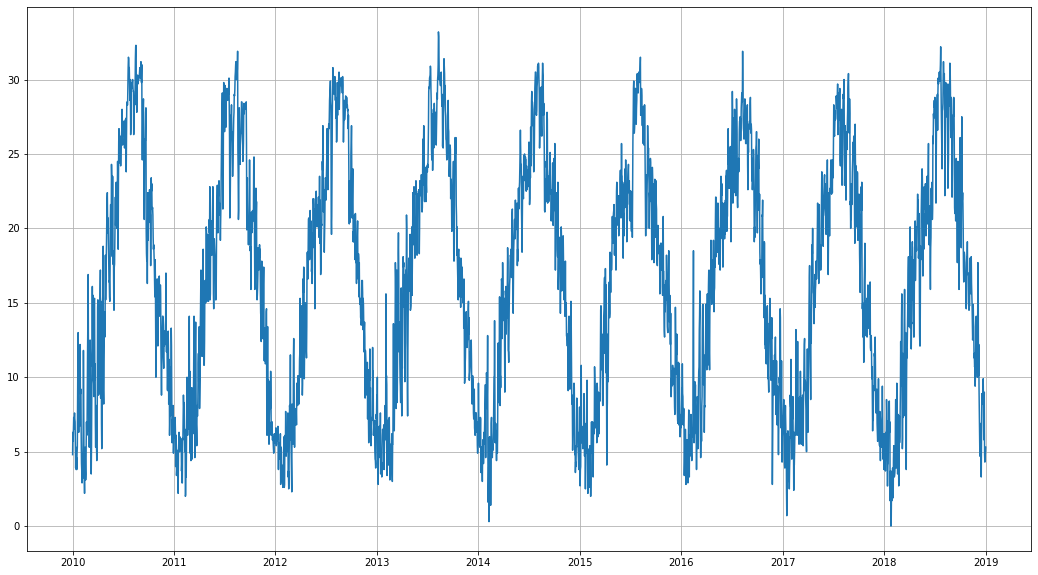

In [71]:
plt.figure(figsize = (18,10))
plt.plot(df['年月日'],df['平均気温(℃)'])
plt.grid()

In [72]:
df.describe()

,平均気温(℃)
count,3288.000000
mean,16.576977
std,8.142092
min,0.000000
25%,8.900000
50%,17.100000
75%,23.100000
max,33.200000


In [73]:
df['POSIX']= df['年月日'].astype(np.int64).values//10**9

In [74]:
x = df['POSIX'].values
y=df['平均気温(℃)'].values

In [75]:
N=len(x)

In [76]:
N

3288

In [77]:
N_train = round(len(x)*0.8)
N_train

2630

In [78]:
N_test = N - N_train

In [79]:
x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]

In [81]:
len(x_train),len(x_test)

(2630, 658)

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [84]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [86]:
x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]

In [87]:
rf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [88]:
y_pred = rf.predict(x_test)

In [89]:
y_pred

array([8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233, 8.233,
       8.233, 8.233,

In [90]:
y_pred_train = rf.predict(x_train)
y_pred_train

array([5.311, 5.971, 5.902, ..., 7.761, 8.445, 8.233])

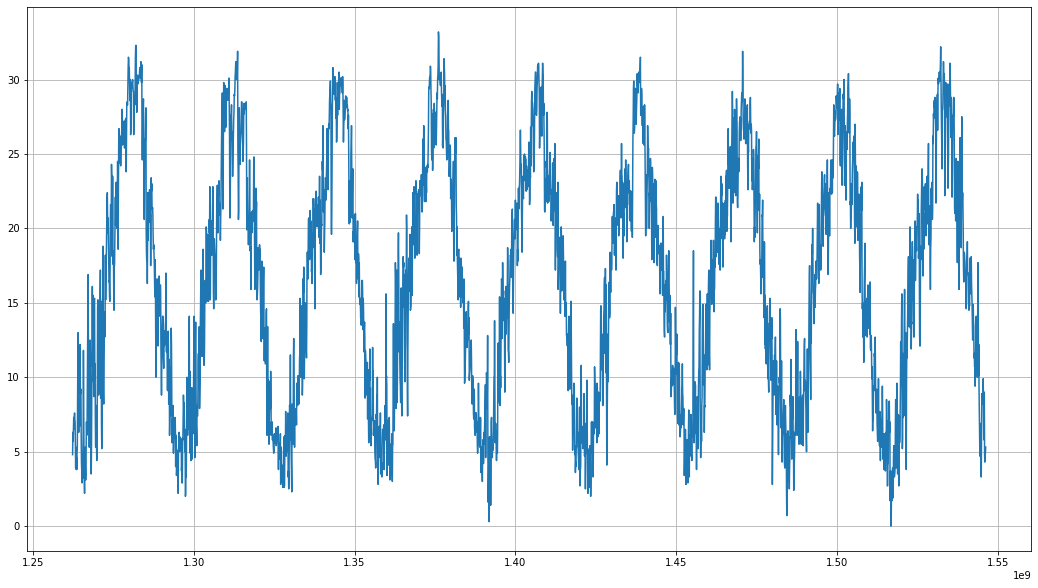

In [91]:
plt.figure(figsize=(18,10))
plt.plot(x,y)
plt.grid()

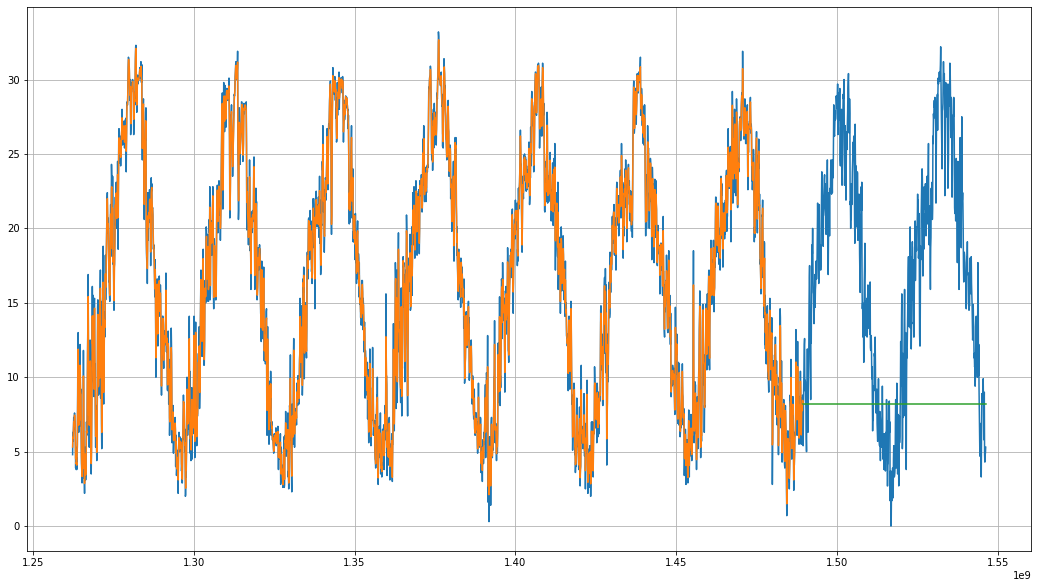

In [92]:
plt.figure(figsize=(18,10))
plt.plot(x,y)
plt.plot(x_train,y_pred_train)
plt.plot(x_test,y_pred)
plt.grid()

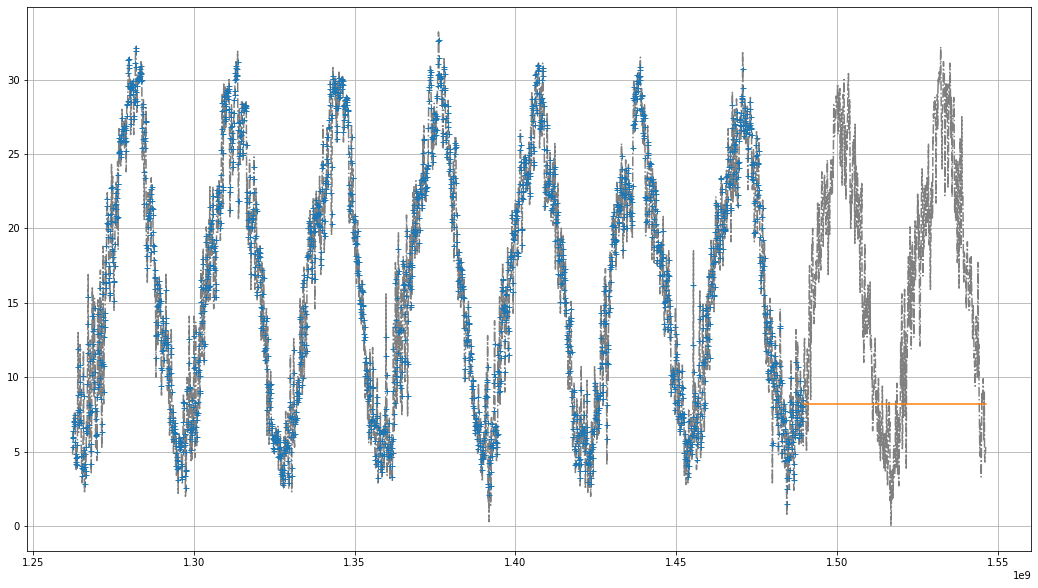

In [93]:
plt.figure(figsize=(18,10))
plt.plot(x,y,color = 'gray',linestyle='dashdot')
plt.plot(x_train,y_pred_train,'+')
plt.plot(x_test,y_pred)
plt.grid()